In [40]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x) # para visualizar solo 2 posiciones decimales



## Dataset
Cargamos el dataset `vehicles.csv` y lo limpiamos utilizando la funcion que desarrollamos en la notebook [Effective Pandas 01]()

In [2]:
data = pd.read_csv('vehicles.csv')
data.shape

<ipython-input-2-6085a6b07cf7>:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('vehicles.csv')


(41144, 83)

In [28]:
from tweak_autos import tweak_autos # tweak_autos tiene que estar en la misma carpeta que esta notebook

autos2 = tweak_autos(data) # esta funcion contiene todas la lineas de codigo para limpiar el dataset
                           # la funcion esta detallada en la notebook Effective Pandas 01
                            
autos2

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs
0,19,21,25,4,2.00,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True
1,9,11,14,12,4.90,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False
2,23,27,33,4,2.20,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True
3,10,11,12,8,5.20,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN
4,17,19,23,4,2.20,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,19,22,26,4,2.20,Front-Wheel Drive,1900,Subaru,Legacy,0,2013-01-01 00:00:00-05:00,1993,True,4,True
41140,20,23,28,4,2.20,Front-Wheel Drive,1850,Subaru,Legacy,0,2013-01-01 00:00:00-05:00,1993,False,5,True
41141,18,21,24,4,2.20,4-Wheel or All-Wheel Drive,2000,Subaru,Legacy AWD,0,2013-01-01 00:00:00-05:00,1993,True,4,True
41142,18,21,24,4,2.20,4-Wheel or All-Wheel Drive,2000,Subaru,Legacy AWD,0,2013-01-01 00:00:00-05:00,1993,False,5,True


In [6]:
autos2.memory_usage(deep = True).sum()

8676214

## `.groupby()`

In [30]:
# agrupamos los datos por anio y calculamos la media para cada columna
# notar que la funcion mean() solo se aplica a las columnas con datos numericos
# en el resultado se excluyen todas las columnas con datos categoricos.

(autos2
 .groupby('year')
.mean()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,speeds
year,,,,,,,,
1984,17.98,19.88,23.08,5.39,3.16,2313.54,0.00,3.93
1985,17.88,19.81,23.04,5.38,3.16,2334.51,0.00,3.92
1986,17.67,19.55,22.70,5.43,3.18,2354.05,0.00,3.98
1987,17.31,19.23,22.45,5.41,3.17,2403.65,0.00,4.04
1988,17.33,19.33,22.70,5.46,3.20,2387.04,0.00,4.13
1989,17.14,19.13,22.47,5.49,3.21,2433.43,0.00,4.17
1990,17.03,19.00,22.34,5.50,3.22,2436.18,0.00,4.24
1991,16.85,18.83,22.25,5.60,3.27,2490.86,0.00,4.30
1992,16.81,18.86,22.44,5.62,3.28,2494.74,0.00,4.32


In [31]:
# si solo queremos analizar algunas de las columnas, podemos selecionarlas
(autos2
 .groupby('year')
 [['comb08', 'speeds']]
 .mean()
)

,comb08,speeds
year,,
1984,19.88,3.93
1985,19.81,3.92
1986,19.55,3.98
1987,19.23,4.04
1988,19.33,4.13
1989,19.13,4.17
1990,19.00,4.24
1991,18.83,4.30
1992,18.86,4.32


## `plot()`
Tambien podemos aprovechar los resultados de la funcion `groupby()` para graficar.

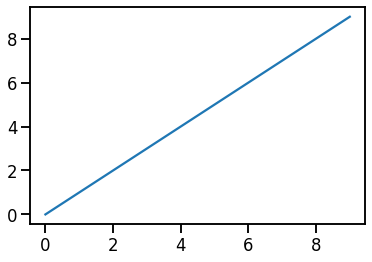

In [32]:
# importamos las librerias que necesitamos y visualizamos un ejemplo para ver el estilo con el que estamos trabajando
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
plt.plot(range(10))
plt.show()

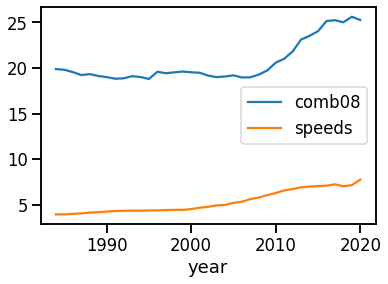

In [33]:
# graficamos una linea temporal que muestre el promedio de dos columnas en funcion de los anios
# la funcion plot() toma el indice del objeto groupby() y lo utiliza como eje x y tomo los valores de las columnas
# para el eje y. Si hay mas de una columna plotea una linea diferente para cada columna.


(autos2
 .groupby('year')
 [['comb08', 'speeds']]
 .mean()
 .plot()                  # dibuja lineplot. En X el indice, en Y los valores de las columnas. En este caso 2.
) 

plt.show()

<AxesSubplot:xlabel='year'>

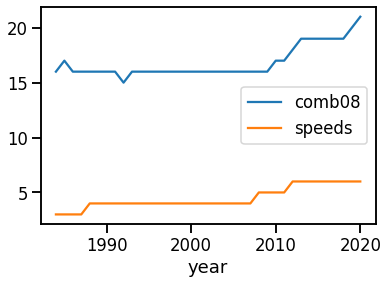

In [34]:
# si en lugar de mean() quisieramos graficar otras funciones matematicas, es muy sencillo de modificar utilizando
# la metodologia de chainning programming que propone Matt Harrison

(autos2
 .groupby('year')
 [['comb08','speeds']]
 .quantile(.25)
 .plot()
)

## `assign()`

- Assign new columns to a DataFrame.
- Returns a new object with all original columns in addition to new ones. Existing columns that are re-assigned will be overwritten.

**nota:** Esta funcion tambien la usamos en la notebok Effective Pandas 01. Es una funcion muy poderosa que permite condensar un sola linea cosas para las que se necesitarian un par de lineas si no utilizaramos la funcion. Es una funcion que hay que empezar a tener siempre a mano. 

In [35]:
# agregamos country al groupby. Pero como esa columna no esta, primero tenemos que crearla
# lo vamos a hacer aprovechando el metodo de chaining programming
def country(val):
    if val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    return 'Other'

(autos2
 .assign(country = autos2.make.apply(country))
 )

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,automatic,speeds,ffs,country
0,19,21,25,4,2.00,Rear-Wheel Drive,2000,Alfa Romeo,Spider Veloce 2000,0,2013-01-01 00:00:00-05:00,1985,False,5,True,Other
1,9,11,14,12,4.90,Rear-Wheel Drive,3850,Ferrari,Testarossa,0,2013-01-01 00:00:00-05:00,1985,False,5,False,Other
2,23,27,33,4,2.20,Front-Wheel Drive,1550,Dodge,Charger,0,2013-01-01 00:00:00-05:00,1985,False,5,True,US
3,10,11,12,8,5.20,Rear-Wheel Drive,3850,Dodge,B150/B250 Wagon 2WD,0,2013-01-01 00:00:00-05:00,1985,True,3,NaN,US
4,17,19,23,4,2.20,4-Wheel or All-Wheel Drive,2700,Subaru,Legacy AWD Turbo,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,19,22,26,4,2.20,Front-Wheel Drive,1900,Subaru,Legacy,0,2013-01-01 00:00:00-05:00,1993,True,4,True,Other
41140,20,23,28,4,2.20,Front-Wheel Drive,1850,Subaru,Legacy,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other
41141,18,21,24,4,2.20,4-Wheel or All-Wheel Drive,2000,Subaru,Legacy AWD,0,2013-01-01 00:00:00-05:00,1993,True,4,True,Other
41142,18,21,24,4,2.20,4-Wheel or All-Wheel Drive,2000,Subaru,Legacy AWD,0,2013-01-01 00:00:00-05:00,1993,False,5,True,Other


In [36]:
# aprovechamos la columna recien creada para utilizarla como otro indice de agrupacion
# notar que con el metodo de chainning programming podemos hacer todo en el mismo bloque sin necesidad de guardar
# los pasos intermedios en nuevas variables, lo cual nos ahorra espacio de memoria

(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year','country'])
 .mean()
)

city08  comb08  highway08  cylinders  displ  fuelCost08  range  \
year country                                                                   
1984 Other     19.38   21.42      24.85       4.91   2.69     2118.13   0.00   
     US        16.08   17.80      20.67       6.03   3.81     2578.87   0.00   
1985 Other     19.28   21.37      24.82       4.87   2.64     2142.00   0.00   
     US        16.28   18.03      21.02       5.95   3.77     2553.90   0.00   
1986 Other     19.17   21.21      24.65       4.80   2.54     2149.15   0.00   
...              ...     ...        ...        ...    ...         ...    ...   
2018 US        23.53   25.93      30.15       5.60   3.39     2037.90  12.54   
2019 Other     23.08   25.46      29.56       5.32   2.84     2093.66   2.58   
     US        24.17   26.25      30.04       5.56   3.42     2093.13  16.42   
2020 Other     22.58   25.17      29.54       5.15   2.69     2050.26   2.45   
     US        24.07   26.57      30.64       4.00   1.98     1650.00   0.00   

              speeds  
year country          
1984 Other      3.97  
     US         3.87  
1985 Other      3.96  
     US         3.89  
1986 Other      4.07  
...              ...  
2018 US         5.60  
2019 Other      7.55  
     US         5.65  
2020 Other      7.74  
     US         7.79  

[74 rows x 8 columns]

## `agg()`
- Aggregate using one or more operations over the specified axis (es decir sobre una serie, que puede ser una fila o una columna).

In [37]:
# Podemos adicionar mas agregados, tanto como que querramos
# incluso podemos crear funciones que nos permitan analizar cualquier parametro.

def second_to_last(ser):
    return ser.iloc[-2] #de vuelve el anteultimo valor de la columna

(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year', 'country'])
 .agg(['min','mean','max', second_to_last])      # en esta linea podemos agregar tantas funciones como querramos
)


<ipython-input-37-68d7f634129a>:7: FutureWarning: ['drive', 'make', 'model', 'createdOn'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  (autos2


city08                           comb08             \
                min  mean  max second_to_last    min  mean  max   
year country                                                      
1984 Other        7 19.38   38             14      8 21.42   41   
     US           8 16.08   35             15      9 17.80   39   
1985 Other        7 19.28   40             19      8 21.37   43   
     US           8 16.28   39             14     10 18.03   42   
1986 Other        6 19.17   42             10      7 21.21   46   
...             ...   ...  ...            ...    ...   ...  ...   
2018 US          11 23.53  136            120     14 25.93  130   
2019 Other        9 23.08  150             19     11 25.46  136   
     US          11 24.17  140            104     14 26.25  133   
2020 Other       13 22.58  127             17     15 25.17  114   
     US          20 24.07   30             21     22 26.57   33   

                            highway08        ... automatic                 \
             second_to_last       min  mean  ...       max second_to_last   
year country                                 ...                            
1984 Other               14         9 24.85  ...      True          False   
     US                  17        10 20.67  ...      True          False   
1985 Other               20         9 24.82  ...      True           True   
     US                  15        10 21.02  ...      True          False   
1986 Other               11         9 24.65  ...      True          False   
...                     ...       ...   ...  ...       ...            ...   
2018 US                 116        15 30.15  ...      True           True   
2019 Other               22        14 29.56  ...      True           True   
     US                 104        15 30.04  ...      True           True   
2020 Other               20        18 29.54  ...      True           True   
     US                  24        26 30.64  ...      True           True   

             speeds                            ffs                             
                min mean max second_to_last    min mean    max second_to_last  
year country                                                                   
1984 Other        3 3.97   5              5  False 0.71   True           True  
     US           3 3.87  20              4  False 0.64   True            NaN  
1985 Other        3 3.96   5              4  False 0.89   True           True  
     US           3 3.89   5              4  False 0.85   True            NaN  
1986 Other        3 4.07   5              4  False 0.93   True            NaN  
...             ...  ...  ..            ...    ...  ...    ...            ...  
2018 US           0 5.60  20              1  False 0.00  False            NaN  
2019 Other        0 7.55  20              8  False 0.00  False            NaN  
     US           0 5.65  20              1  False 0.00  False            NaN  
2020 Other        0 7.74  20              0  False 0.00  False          False  
     US           0 7.79  20              0  False 0.00  False          False  

[74 rows x 40 columns]

## More `plot()`

<AxesSubplot:xlabel='year,country'>

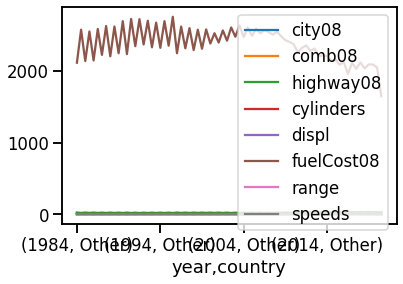

In [38]:
(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .plot()
 )

Claramente, la funcion plot no funciona bien cuando tenemos objetos del tipo groupby con multi-indices. Para resolver este problema tenems la funcion `unstack()`

## `unstack()`
- esta funcion toma el indice mas interno y lo cambia de eje. En este caso el indice country lo va a pasar a columnas.

In [39]:
(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
 )

city08       comb08       highway08       cylinders      displ       \
country  Other    US  Other    US     Other    US     Other   US Other   US   
year                                                                          
1984     19.38 16.08  21.42 17.80     24.85 20.67      4.91 6.03  2.69 3.81   
1985     19.28 16.28  21.37 18.03     24.82 21.02      4.87 5.95  2.64 3.77   
1986     19.17 15.95  21.21 17.65     24.65 20.46      4.80 6.14  2.54 3.93   
1987     18.63 15.61  20.71 17.33     24.19 20.21      4.83 6.16  2.58 3.93   
1988     18.67 15.58  20.81 17.37     24.44 20.42      4.82 6.31  2.53 4.07   
1989     18.53 15.14  20.66 16.91     24.25 19.89      4.88 6.37  2.54 4.17   
1990     18.51 14.85  20.64 16.58     24.27 19.49      4.84 6.47  2.51 4.27   
1991     18.09 14.80  20.17 16.60     23.81 19.68      5.03 6.54  2.61 4.35   
1992     17.92 14.90  20.10 16.74     23.82 20.06      5.15 6.45  2.71 4.25   
1993     18.08 15.01  20.31 16.90     24.17 20.23      5.11 6.50  2.68 4.28   
1994     18.05 14.95  20.26 16.83     24.17 20.20      5.19 6.61  2.71 4.41   
1995     17.68 14.53  20.09 16.42     24.26 19.75      5.44 6.72  2.91 4.51   
1996     18.48 14.93  20.91 16.96     25.09 20.54      5.15 6.58  2.71 4.28   
1997     18.09 14.98  20.51 16.99     24.68 20.68      5.26 6.58  2.79 4.22   
1998     17.93 15.29  20.46 17.41     24.70 20.94      5.28 6.44  2.80 4.11   
1999     17.93 15.71  20.39 17.76     24.58 21.10      5.38 6.36  2.83 4.04   
2000     17.88 15.71  20.30 17.76     24.42 21.13      5.44 6.33  2.86 3.98   
2001     17.94 15.64  20.29 17.50     24.37 20.77      5.48 6.31  2.87 3.98   
2002     17.64 15.08  20.08 16.98     24.21 20.20      5.58 6.43  2.94 4.06   
2003     17.57 14.83  19.95 16.63     24.05 19.81      5.68 6.59  3.03 4.17   
2004     17.43 14.93  19.92 16.81     24.16 20.17      5.73 6.56  3.09 4.20   
2005     17.41 15.20  19.89 17.13     24.19 20.66      5.77 6.45  3.15 4.13   
2006     17.06 15.30  19.51 17.29     23.76 20.88      5.98 6.48  3.35 4.17   
2007     17.00 15.49  19.45 17.63     23.74 21.20      6.04 6.51  3.42 4.21   
2008     17.24 15.77  19.68 17.94     23.98 21.70      6.10 6.52  3.46 4.22   
2009     17.70 16.15  20.19 18.26     24.59 22.14      5.97 6.62  3.40 4.35   
2010     18.33 17.28  20.85 19.60     25.26 23.79      5.90 6.22  3.36 4.05   
2011     19.25 16.82  21.64 19.01     25.86 22.97      5.85 6.39  3.32 4.17   
2012     19.84 17.80  22.34 20.11     26.70 24.17      5.79 6.30  3.27 4.09   
2013     20.98 19.45  23.47 21.82     27.86 26.16      5.66 6.15  3.18 3.88   
2014     21.16 20.51  23.66 23.01     28.09 27.52      5.72 5.85  3.21 3.62   
2015     21.35 21.82  23.94 24.44     28.48 29.00      5.60 5.75  3.10 3.61   
2016     21.90 25.06  24.44 27.70     28.87 32.27      5.49 5.36  2.99 3.28   
2017     22.42 24.00  24.91 26.50     29.21 30.83      5.43 5.53  2.92 3.42   
2018     22.31 23.53  24.78 25.93     29.04 30.15      5.40 5.60  2.89 3.39   
2019     23.08 24.17  25.46 26.25     29.56 30.04      5.32 5.56  2.84 3.42   
2020     22.58 24.07  25.17 26.57     29.54 30.64      5.15 4.00  2.69 1.98   

        fuelCost08         range       speeds       
country      Other      US Other    US  Other   US  
year                                                
1984       2118.13 2578.87  0.00  0.00   3.97 3.87  
1985       2142.00 2553.90  0.00  0.00   3.96 3.89  
1986       2149.15 2588.74  0.00  0.00   4.07 3.89  
1987       2227.32 2630.04  0.00  0.00   4.14 3.90  
1988       2207.48 2623.26  0.00  0.00   4.21 4.03  
1989       2250.00 2698.09  0.00  0.00   4.26 4.03  
1990       2238.26 2728.74  0.00  0.00   4.33 4.11  
1991       2348.58 2725.76  0.00  0.00   4.34 4.23  
1992       2373.27 2703.76  0.00  0.00   4.36 4.25  
1993       2333.10 2677.20  0.00  0.00   4.37 4.28  
1994       2326.04 2697.63  0.00  0.00   4.36 4.29  
1995       2355.19 2759.68  0.00  0.00   4.38 4.31  
1996       2250.29 2622.59  0.00  0.00   4.42 4.26  

<AxesSubplot:xlabel='year'>

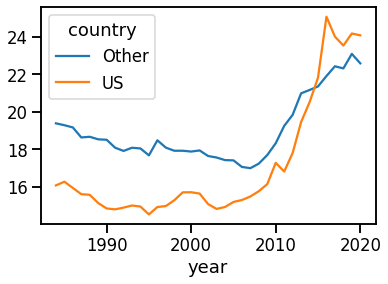

In [46]:
# la funcion unstack() nos va a permitir realizar una visualizacion mucho mejor de las columnas agregadas 
# por anio y por country
(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
 .city08
 .plot()
 )

## `rolling()`
- Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.

<AxesSubplot:xlabel='year'>

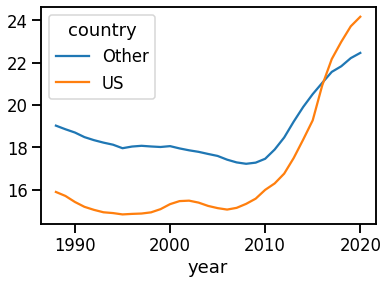

In [57]:
(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year', 'country'])
 .mean()
 .unstack()
 .city08
 .rolling(5)
 .mean()
 .plot()
 )

## `gt()`

- Get Greater than of dataframe and other, element-wise (binary operator gt)

Supongamos que queremos obtener lo anio en donde el comsumo fue mayor a 700...

In [60]:
(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year','country'])
 .count()
)

city08  comb08  highway08  cylinders  displ  drive  fuelCost08  \
year country                                                                   
1984 Other      1131    1131       1131       1131   1131   1131        1131   
     US          833     833        833        833    833    833         833   
1985 Other       906     906        906        906    906    906         906   
     US          795     795        795        795    795    795         795   
1986 Other       646     646        646        646    646    646         646   
...              ...     ...        ...        ...    ...    ...         ...   
2018 US          281     281        281        281    281    281         281   
2019 Other      1033    1033       1033       1033   1033   1033        1033   
     US          284     284        284        284    284    284         284   
2020 Other       195     195        195        195    195    195         195   
     US           14      14         14         14     14     14          14   

              make  model  range  createdOn  automatic  speeds   ffs  
year country                                                          
1984 Other    1131   1131   1131       1131       1131    1131  1065  
     US        833    833    833        833        831     833   634  
1985 Other     906    906    906        906        906     906   821  
     US        795    795    795        795        795     795   592  
1986 Other     646    646    646        646        646     646   608  
...            ...    ...    ...        ...        ...     ...   ...  
2018 US        281    281    281        281        281     281   188  
2019 Other    1033   1033   1033       1033       1033    1033   855  
     US        284    284    284        284        284     284   203  
2020 Other     195    195    195        195        195     195   165  
     US         14     14     14         14         14      14     7  

[74 rows x 14 columns]

In [65]:
def vals_gt(df_, num):
    return df_[df_.gt(num)].dropna()

(autos2
 .assign(country = autos2.make.apply(country))
 .groupby(['year','country'])
 .count()
 .pipe(vals_gt, 700)
)

,,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,automatic,speeds,ffs
year,country,,,,,,,,,,,,,,
1984,Other,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1065.00
1985,Other,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,906.00,821.00
1991,Other,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00,705.00
1992,Other,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,707.00
1993,Other,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00,707.00
2017,Other,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,766.00
2018,Other,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,1063.00,844.00
2019,Other,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,1033.00,855.00


**nota:** La funcion `pipe()` es una funcion super interesante para implementar en el analisis de datos usando pandas.
Es una funcion que tiene mucho para sacar, por lo tanto la voy a dejar para otra notebook. En cuanto la tenga voy a pegar aca el [link](https://github.com/nicoambrosis) a esa notebook